Notebook pour faire différentes experiences

In [5]:
import json
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.colors import LogNorm

import pandas as pd
from scipy.stats import gaussian_kde
import scipy.ndimage as ndimage
import skopt
import skopt.plots

from core import *
import core.display

from os import listdir
from os.path import isfile, join


In [3]:
%load_ext autoreload
%autoreload 2

### Plot the test error as a function of $\lambda$ for various $\alpha$

In [4]:
def get_errors(sig, d, alpha, lamb_error, lamb_r2_score):
    lamb_error_test_error = []
    lamb_r2_score_test_error = []

    for i in range(len(alpha)):
        a = alpha[i]
        l_e = lamb_error[i]
        l_s = lamb_r2_score[i]

        w = np.random.normal(0., 1., d)
        l_e_error = gcm_erm.compute_se(d, a, sig, l_e, w)
        l_s_error = gcm_erm.compute_se(d, a, sig, l_s, w)
        lamb_error_test_error.append(l_e_error['test_error'])
        lamb_r2_score_test_error.append(l_s_error['test_error'])

    return lamb_error_test_error, lamb_r2_score_test_error

In [5]:
def get_bayesian_error(sig, alpha):
    bayesian_error = []

    for i in range(len(alpha)):
        a = alpha[i]
        q, _ = bo_state_evolution.iterate_se(a, sig=sig)
        bayesian_error.append(losses.classification_error_overlap(q, 1., sig))

    return bayesian_error

In [6]:
def save_info(sig, alpha, min_error_error, max_score_error, fname):
    dic = {
        'sig' : sig,
        'alpha' : alpha,
        'min_error_test_error' : min_error_error,
        'max_score_test_error' : max_score_error
    }

    with open(fname, 'w+') as f:
        json.dump(dic, f)

In [7]:
def load_lambda(file):
    with open(file) as f:
        info = json.load(f)

    alpha = info['alpha']
    min_error = info['lambda_error']
    max_score = info['lambda_r2_score']

    return alpha, min_error, max_score

In [44]:
sig_0_alpha, sig_0_min_error, sig_0_max_score = load_lambda("experiments_results/to_save/lambda_search/sig-0/lambda_search_result.json")
sig_01_alpha, sig_01_min_error, sig_01_max_score = load_lambda("experiments_results/to_save/lambda_search/sig-01/lambda_search_result.json")
sig_03_alpha, sig_03_min_error, sig_03_max_score = load_lambda("experiments_results/to_save/lambda_search/sig-03/lambda_search_result.json")
sig_1_alpha, sig_1_min_error, sig_1_max_score = load_lambda("experiments_results/to_save/lambda_search/sig-1/lambda_search_result.json")
sig_2_alpha, sig_2_min_error, sig_2_max_score = load_lambda("experiments_results/to_save/lambda_search/sig-2/lambda_search_result.json")

In [35]:
d = 1000
sig_0_min_error_test_error, sig_0_max_score_test_error = get_errors(0.1, d, sig_0_alpha, sig_0_min_error, sig_0_max_score)
sig_01_min_error_test_error, sig_01_max_score_test_error = get_errors(0.1, d, sig_01_alpha, sig_01_min_error, sig_01_max_score)
sig_03_min_error_test_error, sig_03_max_score_test_error = get_errors(.3, d, sig_03_alpha, sig_03_min_error, sig_03_max_score)
sig_1_min_error_test_error, sig_1_max_score_test_error = get_errors(1., d, sig_1_alpha, sig_1_min_error, sig_1_max_score)

In [47]:
sig_2_min_error_test_error, sig_2_max_score_test_error = get_errors(2., d, sig_2_alpha, sig_2_min_error, sig_2_max_score)

In [38]:
sig_0_bayesian_error = get_bayesian_error(0., sig_0_alpha)
sig_01_bayesian_error = get_bayesian_error(0.1, sig_01_alpha)
sig_03_bayesian_error = get_bayesian_error(0.3, sig_03_alpha)
sig_1_bayesian_error = get_bayesian_error(1., sig_1_alpha)

In [48]:
sig_2_bayesian_error = get_bayesian_error(2., sig_2_alpha)

In [49]:
# SAVE THE DATA

save_info(0., sig_0_alpha, sig_0_min_error, sig_0_max_score, 'experiments_results/to_save/lambda_search/sig-0/test_errors.json')
save_info(.1, sig_01_alpha, sig_01_min_error, sig_01_max_score, 'experiments_results/to_save/lambda_search/sig-01/test_errors.json')
save_info(.3, sig_03_alpha, sig_03_min_error, sig_03_max_score, 'experiments_results/to_save/lambda_search/sig-03/test_errors.json')
save_info(1., sig_1_alpha, sig_1_min_error, sig_1_max_score, 'experiments_results/to_save/lambda_search/sig-1/test_errors.json')
save_info(2., sig_2_alpha, sig_2_min_error, sig_2_max_score, 'experiments_results/to_save/lambda_search/sig-2/test_errors.json')

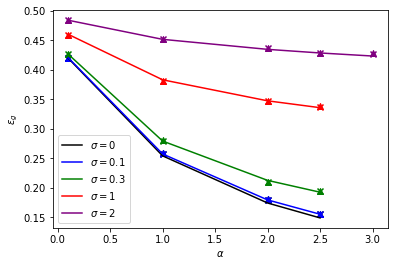

In [50]:

plt.plot(sig_0_alpha, sig_0_bayesian_error, c='k', label='$\\sigma = 0$')
plt.scatter(sig_0_alpha, sig_0_min_error_test_error, c='k', marker='x')
plt.scatter(sig_0_alpha, sig_0_max_score_test_error, c='k', marker='^')

plt.plot(sig_01_alpha, sig_01_bayesian_error, c='b', label='$\\sigma = 0.1$')
plt.scatter(sig_01_alpha, sig_01_min_error_test_error, c='b', marker='x')
plt.scatter(sig_01_alpha, sig_01_max_score_test_error, c='b', marker='^')


plt.plot(sig_03_alpha, sig_03_bayesian_error, c='g', label='$\\sigma = 0.3$')
plt.scatter(sig_03_alpha, sig_03_min_error_test_error, c='g', marker='x')
plt.scatter(sig_03_alpha, sig_03_max_score_test_error, c='g', marker='^')

plt.plot(sig_1_alpha, sig_1_bayesian_error, c='r', label='$\\sigma = 1$')
plt.scatter(sig_1_alpha, sig_1_min_error_test_error, c='r', marker='x')
plt.scatter(sig_1_alpha, sig_1_max_score_test_error, c='r', marker='^')

plt.plot(sig_2_alpha, sig_2_bayesian_error, c='purple', label='$\\sigma = 2$')
plt.scatter(sig_2_alpha, sig_2_min_error_test_error, c='purple', marker='x')
plt.scatter(sig_2_alpha, sig_2_max_score_test_error, c='purple', marker='^')

plt.xlabel('$\\alpha$')
plt.ylabel('$\\varepsilon_g$')
plt.legend()

plt.show()

###  Code do display the density of P(y = y*) for logistic and BO inference

alpha-1.00-lamb-max-score.json


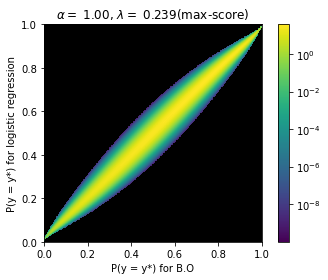

alpha-2.00-lamb-max-score.json


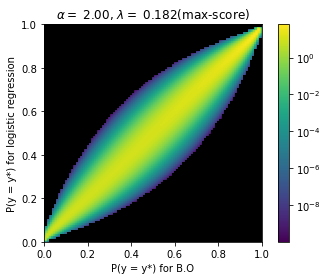

alpha-2.50-lamb-max-score.json


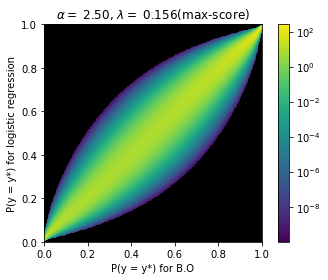

alpha-0.10-lamb-max-score.json


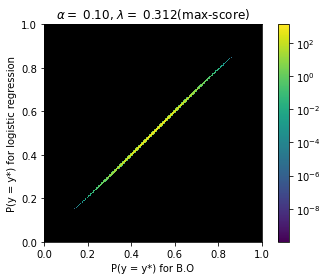

alpha-1.00-lamb-min-error.json


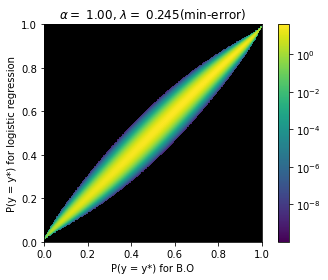

alpha-2.50-lamb-min-error.json


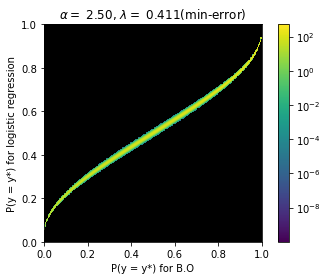

alpha-2.00-lamb-min-error.json


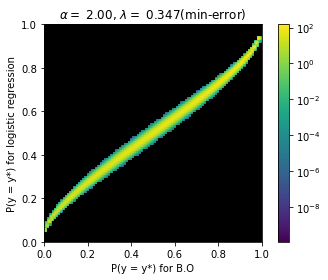

alpha-0.10-lamb-min-error.json


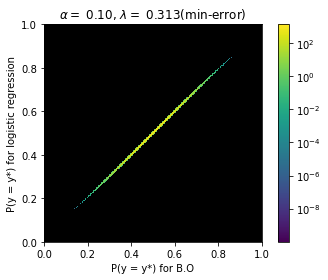

In [7]:
folder = 'experiments_results/to_save/joint_density/sig-1/'
onlyfiles = [f for f in listdir(folder) if isfile(join(folder, f)) and '.json' in f]

for fname in onlyfiles:
    density = core.display.plot_from_file(join(folder, fname))
    f = fname[:-4] + 'png'
    print(fname)
    # plt.savefig(join(folder, f))
    plt.show()

### Calcul de la calibration 

In [96]:
def load_overlaps(fname): 
    with open(fname) as f:
        overlaps = json.load(f)
    return overlaps

def plot_calibration(overlaps):
    """
    Plot the calibration for 
    """
    qerm, qbo, ovrlp = overlaps['qerm'], overlaps['qbo'], overlaps['experimental-cross-correlation']
    m = overlaps['m']
    sig = overlaps['sig']
    alpha = overlaps['alpha']
    ps = np.linspace(0.001, 0.999, 100)
    y = []
    y2 = []

    for p in ps:
        # y.append(p - calibration.compute_bo_calibration(p, qbo, qerm, ovrlp))
        y2.append(p - calibration.compute_teacher_calibration(p, 1., qerm, m, sig))

    # plt.plot(ps, y, label='BO, $\\alpha = $' + str(alpha))
    plt.plot(ps, y2, label='teacher, $\\alpha = $' + str(alpha))
    plt.legend()
    plt.xlim([0., 1.])
    plt.ylim([0., 1.])
    plt.grid(which='both')

    plt.xlabel('p')
    plt.ylabel('P($y^{BO}$ = 1 | $\hat{f}(x) = p$)')

    plt.title('alpha = ' + str(alpha) + 'sig = ' + str(sig))

    return y, y2